<a href="https://colab.research.google.com/github/YuriiKlim/AI/blob/Image_neural_1/Segmentation_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання 1

Зробіть сегментацію для наступного зображення https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/cat.jpg

* завантежте модель `deeplabv3_resnet50` та відповідні ваги `DeepLabV3_ResNet50_Weights` [документація](https://pytorch.org/vision/stable/models/generated/torchvision.models.segmentation.deeplabv3_resnet50.html#deeplabv3-resnet50)
* застосуйте `transforms.Resize` до зображення
* застосуйте `transforms` з ваг до зображення
* змініть розмірність зображення на потрібну
* отримайте результат моделі
* застосуйте `draw_segmentation_masks`

In [65]:
import torch
from torchvision.io.image import read_image
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision import transforms

img = read_image("C:/Users/klimk/Pictures/cat.jpg")

img = transforms.Resize((520, 520))(img)

weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()

preprocess = weights.transforms(resize_size=None)

batch = preprocess(img)
batch = batch.unsqueeze(0)

with torch.no_grad():
  prediction = model(batch)["out"]

masks = prediction.argmax(dim=1)
mask = masks[0]

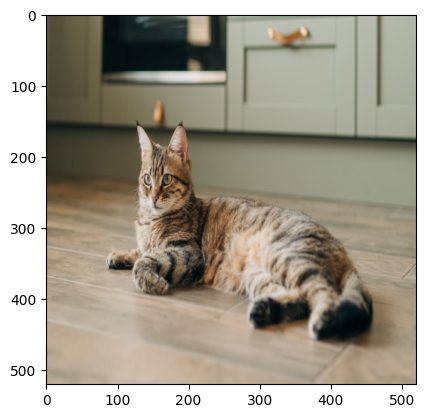

In [66]:
import matplotlib.pyplot as plt

plt.imshow(img.permute(1, 2, 0))

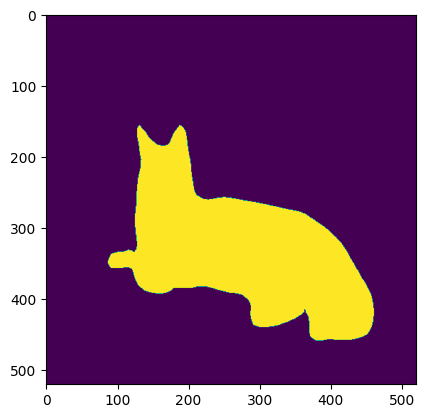

In [67]:
plt.imshow(mask)

In [68]:
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
class_to_idx

{'__background__': 0,
 'aeroplane': 1,
 'bicycle': 2,
 'bird': 3,
 'boat': 4,
 'bottle': 5,
 'bus': 6,
 'car': 7,
 'cat': 8,
 'chair': 9,
 'cow': 10,
 'diningtable': 11,
 'dog': 12,
 'horse': 13,
 'motorbike': 14,
 'person': 15,
 'pottedplant': 16,
 'sheep': 17,
 'sofa': 18,
 'train': 19,
 'tvmonitor': 20}

In [69]:
mask.unique()

tensor([0, 8])

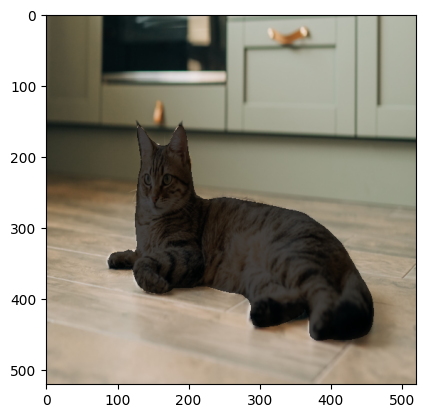

In [70]:
from torchvision.utils import draw_segmentation_masks

cat_mask = mask == class_to_idx['cat']

masked_img = draw_segmentation_masks(img, cat_mask, alpha=0.7)

plt.imshow(masked_img.permute(1, 2, 0))

In [71]:
import numpy as np

kitchen = read_image("C:/Users/klimk/Pictures/kitchen.jpg")

kitchen = transforms.Resize((520, 520))(img)
kitchen = torch.tensor(np.array(kitchen)).permute(2, 0, 1)

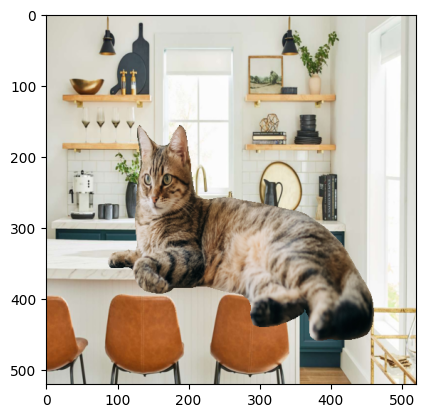

In [74]:
import torch
import matplotlib.pyplot as plt
from torchvision.io import read_image
from torchvision import transforms
import numpy as np

kitchen = read_image("C:/Users/klimk/Pictures/kitchen.jpg")
kitchen = transforms.Resize((520, 520))(kitchen).float()

masked_img = img.clone().float()

masked_img[:, ~cat_mask] = kitchen[:, ~cat_mask]

masked_img = draw_segmentation_masks(masked_img.to(torch.uint8), cat_mask, alpha=0)

plt.imshow(masked_img.permute(1, 2, 0).numpy().astype(np.uint8))
plt.show()

# Завдання 2

Проведіть виявлення об'єктів на даному зображенні https://www.thespruce.com/thmb/o_zAsNy0xWNWeq9xfWwAo6fhueo=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/SPR-luxury-kitchens-5211364-hero-688d716970544978bc12abdf17ce6f83.jpg

* Підберіть різні параметри `conf` та `iou` щоб подивитись на результат роботи моделі
* За допомогою параметра `classes` визначіть на зображенні лише:
  1. стільці
  2. бокали для вина
  3. рослини та вази

In [8]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

results = model.predict(source='https://www.thespruce.com/thmb/o_zAsNy0xWNWeq9xfWwAo6fhueo=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/SPR-luxury-kitchens-5211364-hero-688d716970544978bc12abdf17ce6f83.jpg',
                        conf = 0.25,
                        iou=0.5,
                        imgsz=1000,
                        classes=[56, 40, 58, 75])

result = results[0]


WARNING  imgsz=[1000] must be multiple of max stride 32, updating to [1024]
Found https://www.thespruce.com/thmb/o_zAsNy0xWNWeq9xfWwAo6fhueo=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/SPR-luxury-kitchens-5211364-hero-688d716970544978bc12abdf17ce6f83.jpg locally at SPR-luxury-kitchens-5211364-hero-688d716970544978bc12abdf17ce6f83.jpg
image 1/1 C:\Users\klimk\SPR-luxury-kitchens-5211364-hero-688d716970544978bc12abdf17ce6f83.jpg: 704x1024 4 wine glasss, 3 chairs, 3 potted plants, 2 vases, 85.0ms
Speed: 4.0ms preprocess, 85.0ms inference, 87.8ms postprocess per image at shape (1, 3, 704, 1024)


In [9]:
result.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [10]:
img_with_detection = result.plot(filename='result.png',
                                 save=True)

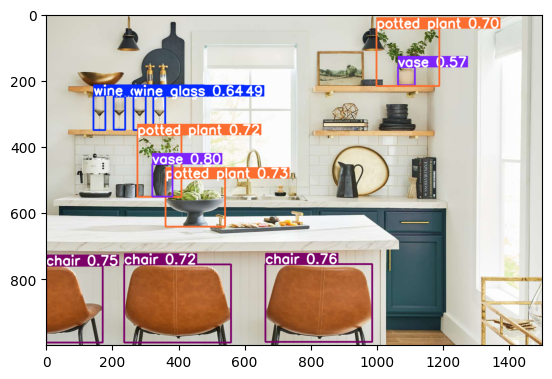

In [11]:
plt.imshow(img_with_detection[:, :, ::-1])